# 机器学习实验报告
## Lab3：Parametric(Nonparametric) Estimation
- 姓名：周钰宸
- 学号：2111408
- 专业：信息安全

## 1 实验要求
### 1.1 基本要求
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$

<img src="https://i.loli.net/2021/03/31/7WT8naYPQc9N56x.png" alt="image.png" style="zoom: 40%;" /> 
<img src="https://i.loli.net/2021/03/31/qsetFODzM7IhYaN.png" alt="image.png" style="zoom:40%;" />

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

### 1.2 中级要求
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果


### 1.3 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计
结果

## 2 实验原理

### 2.1 似然率测试规则和最大后验概率规则
"似然率测试规则"（Likelihood Ratio Test Rule）和"最大后验概率规则"（Maximum A Posteriori Rule，MAP）是用于分类和估计的统计决策规则。它们基于最大似然估计（MLE）和最大后验概率估计（MAP）的原则来做出决策。

1. **似然率测试规则 (Likelihood Ratio Test Rule, LRT):**
   - 似然率测试规则是一种统计决策规则，用于分类或估计给定数据的模型。
   - 基于最大似然估计（MLE），该规则选择具有最大似然估计概率的模型。
   - 在分类问题中，似然率测试规则会计算每个模型对于给定数据的似然概率，然后选择具有最大似然概率的模型作为数据的分类结果。

2. **最大后验概率规则 (Maximum A Posteriori Rule, MAP):**
   - 最大后验概率规则是一种基于贝叶斯统计的决策规则，用于分类或估计。
   - 基于最大后验概率估计（MAP），该规则考虑了先验概率和似然概率，选择具有最大后验概率的模型。
   - 在分类问题中，MAP规则会计算每个模型对于给定数据的后验概率，然后选择具有最大后验概率的模型作为数据的分类结果。

**本次实验会多次用到这两个规则，基于二者对数据进行分类处理。**

## 3 实验流程
### 3.1 导入所需要的包

In [12]:
# !/usr/bin/env python
# -*- encoding: utf-8 -*-
"""
@Project ：Machine Learning 
@File    ：main.py
@IDE     ：PyCharm 
@Author  ：ErwinZhou
@Date    ：2023/10/30 8:16 
"""
import numpy as np
import pickle
# ---初级要求---
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
# ---中级要求---
# ---高级要求---

## 3.2 基础要求

### 3.2.1 生成随机数据
本次实验中要求生成两组随机二维数据X1和X2，其中两者都可能属于三种不同的模型。
* 相同点：三种不同的模型具有不同的均值，但是具有着相同的方差与协方差**（协方差为0，这是为了保证二维数据不同维度之间彼此独立，也是MLE和MAP的理论基础）。**
* 不同点：两组数据的先验概率不同，也就说在未进行任何观察之前，某个数据属于三种不同模型的概率。其中X1要求先验概率相同，X2有着0.6，0.3，0.1的占比。

基于上述要求，本次生成随机数据主要使用**numpy的multivariate_normal**生成多元正态分布的数据，并且通过pickle库dump保存起来。同时函数返回的还有**标签，即属于哪个模型**，方便后续进行预测时候的对比分析。

In [13]:
# -----Basic Requirement -----
def generate_data(n, N, means, covariances, p, description, Is_dump=True, ):
    """
    @todo: Generation of data based on different features of the model itself
           and dumps it for later use
    @param n: number of model those data ara likely to come from
    @param N: number of data
    @param means: average feature[list with arrays]
    @param covariances: variance and covariance[list with matrix]
    @param p: prior probability of the data
    @para description: string for data storage
    @param Is_dump: if there is a need to dump the data
    @return: data: store the result
    @return labels: store the model of each data point belongs to/come from
    """
    data = []  # store the result
    labels = []  # store the model of each data point belongs to/come from

    for _ in range(N):
        model_choice = np.random.choice(np.arange(1, n + 1), p=p)
        # generate normal distribution based on mean and covariance
        data_point = np.random.multivariate_normal(means[model_choice - 1], covariances[model_choice - 1])
        data.append(data_point)
        labels.append(model_choice)

    if Is_dump:
        with open(f"D:\\Codes\\Machine Learning\\Lab03\\data_{description}.dis", "wb") as f:
            pickle.dump((data, labels), f)

    return data, labels

In [14]:
mean1 = [np.array([1, 4]), np.array([4, 1]), np.array([8, 4])]
mean2 = mean1
D1 = [
    2 * np.identity(2),
    2 * np.identity(2),
    2 * np.identity(2)
]
D2 = D1
p1 = [1 / 3, 1 / 3, 1 / 3]
p2 = [0.6, 0.3, 0.1]

X1, labels1 = generate_data(3, 1000, mean1, D1, p1, "X1")
X2, labels2 = generate_data(3, 1000, mean2, D2, p2, "X2")
print("----------X1 and labels1--------")
print(X1)
print(labels1)
print()
print("----------X2 and labels2--------")
print(X2)
print(labels2)

----------X1 and labels1--------
[array([9.94582434, 2.9540156 ]), array([6.15736171, 1.01894112]), array([2.27063768, 7.31279197]), array([-1.20047739,  4.52265162]), array([5.16564322, 0.4837556 ]), array([1.27447731, 1.372681  ]), array([8.76734939, 2.69519294]), array([ 1.40441212, -0.33955274]), array([ 2.78076856, -0.1298775 ]), array([8.22132594, 2.95117307]), array([0.42523255, 5.44432928]), array([5.71709128, 1.93268161]), array([3.91145475, 3.48728366]), array([2.23610324, 3.29479231]), array([10.00494096,  2.78602197]), array([6.59944811, 1.82956545]), array([7.99881718, 4.31743989]), array([3.41478554, 1.18406699]), array([0.84077624, 5.94188008]), array([3.30507226, 1.12303332]), array([3.86544523, 2.85200718]), array([3.88991598, 0.917089  ]), array([0.48662519, 3.67478418]), array([1.80541939, 5.72670918]), array([0.97695265, 2.82266751]), array([5.7182827 , 1.09615719]), array([6.42851317, 2.70907732]), array([0.25298897, 2.09912244]), array([0.1079697, 3.2265509]), arr

**可以看到成功地生成了所需的随机数据，**其中X1和X2都是list存储了1000个二维的array，而labels中存储的是1000数据生成它们时候属于的模型类别。

### 3.2.2 计算似然函数与后验概率
由于后面需要在两个数据集合上分别应用“似然率测试规则”（Likelihood Ratio Test）和“最大后验概率规则”（Maximum A Posteriori）进行分类实验，计算分类错误率。

**因此这里首先根据助教学长提供的公式，写出计算似然函数和后验概率的函数，其中后验概率需要用到似然函数计算的结果。**

In [15]:
def calculate_pxw(x, mean, covariance):
    """
    @todo To calculate likelihood p(x|w) for normal distribution
    @param x: one component of tha dataset X
    @param mean: means from different models
    @param covariance: covariances from differen
    t models
    @return: result
    """
    det_cov = np.linalg.det(covariance)  # Determinant of the covariance matrix
    inv_cov = np.linalg.inv(covariance)  # Inverse of the covariance matrix

    return (1/(2*np.pi*np.sqrt(det_cov))*
            np.exp(-0.5 *np.dot( # exponent
                np.dot((x - mean),inv_cov), (x - mean))
                   )
            )

def calculate_likelihood(x, means, covariances):
    """
    @todo Using scipy to calculate likelihood for Likelihood Ratio Test Rule
    @param x: one component of tha dataset X
    @param means: means from different models
    @param covariances: covariances from different models
    @return:
    """
    likelihoods = []
    # grab a pair each time using zip
    for mean, covariance in zip(means, covariances):
        # calculate the probability density of multivariable of normal data distribution
        likelihood = calculate_pxw(x, mean, covariance)
        # likelihood = scipy.stats.multivariate_normal.pdf(x, mean=mean, cov=covariance)
        likelihoods.append(likelihood)

    return likelihoods

def calculate_posterior(x, means, covariances, priors):
    """
    @todo To calculate posterior for a single data in X
    @param x: one component of tha dataset X
    @param means: means from different models
    @param covariances: covariances from different models
    @param priors: priors from different models
    @return:
    """
    # calculate the likelihoods first
    likelihoods = calculate_likelihood(x, means, covariances)
    # for each pair of likelihood and prior,
    # calculate their multiplication
    posteriors = [l * p for l, p in zip(likelihoods, priors)]
    # 0-1
    posteriors = posteriors / np.sum(posteriors)

    return posteriors

具体而言，有一些实验处理细节需要说明：
* **计算似然函数：** 这里直接使用了**scipy的stats库中的multivariate_normal.pdf即一个专门用来计算多元正态分布的概率密度函数**。

    该函数能够接收三个参数，依次是想要计算概率密度的点，多元正态分布的均值和协方差矩阵。
    
    返回的就是依次在**这三个模型（不同参数实际上就确定了不同的模型下）下，观察到x数据点出现的概率。注意这里与概率密度不同，三者加和并不为1。**


* **计算后验概率：** 这里是基于贝叶斯公式进行的计算，不过由于**分母的值即常数项数据点x的边缘概率（即在所有可能的类别下，观察到数据点x的总概率）实际上对于三个模型都是一样的。**

    **因此这里只计算了分子，对分母进行了忽略，** 最后进行了归一化处理。

### 3.2.3 分类函数与错误率计算函数编写
基于“似然率测试规则”（LRT）和“最大后验概率规则”（MAP）进行分类，使用之前编写的**calculate_likelihood和calculate_posterior两个函数。**

注意模型的下标是从1开始的，但是应用argmax时候最好返回的索引从0开始，因此需要进行+1处理。

In [16]:
def classify_data(data, means, covariances, priors, TestRule):
    """
    @todo Classify data according to different rule
    @param data:
    @param means: means from different models
    @param covariances: covariances from different models
    @param priors: priors from different models
    @param TestRule: LRT or MAP
    @return: classification results
    """
    likelihoods = [calculate_likelihood(x, means, covariances) for x in data]
    posteriors = [calculate_posterior(x, means, covariances, priors) for x in data]
    if TestRule == "LRT":
        # Likelihood Ratio Test Rule
        return [np.argmax(l)+1 for l in likelihoods]
        # Maximum A Posteriori Rule
    elif TestRule == "MAP":
        return [np.argmax(p)+1 for p in posteriors]


**基于之前保留的labels和classify_data的结果，计算错误率：**

In [17]:
def calculate_error_rate(labels, predicted_labels):
    """
    @todo calculate error rates
    @param labels: true labels
    @param predicted_labels: results from classify_data
    @return: error rates
    """
    return sum(l != p for l, p in zip(labels, predicted_labels)) / len(labels)

### 3.2.5 分类实验与结果分析
接下来就直接使用上面编写的classify_data和calculate_error_rate进行分类实验：
* X1：似然率测试规则，LRT
* X2：最大后验概率规则，MAP

In [18]:
LRT_error_rate = calculate_error_rate(labels1, classify_data(X1, mean1, D1, p1, "LRT"))
MAP_error_rate = calculate_error_rate(labels2, classify_data(X2, mean2, D2, p2, "MAP"))

LRT_accuracy = 1 - LRT_error_rate
MAP_accuracy = 1 - MAP_error_rate

print(f"Error Rate of LRT on X1: {LRT_error_rate*100:.2f}%")
print(f"Accuracy of LRT on X1: {LRT_accuracy*100:.2f}%")

print(f"Error Rate of MAP on X2: {MAP_error_rate*100:.2f}%")
print(f"Accuracy of MAP on X2: {MAP_accuracy*100:.2f}%")


Error Rate of LRT on X1: 7.50%
Accuracy of LRT on X1: 92.50%
Error Rate of MAP on X2: 6.10%
Accuracy of MAP on X2: 93.90%


可以发现分别对X1使用似然概率规则和对X2使用最大后验概率规则后，**均能够取得低于百分之10的分类错误率，正确率均在90%以上。**

**证明了模型和规则的使用和建立都较为成功，参数估计的这两种方法都能较高程度地完成多元正态分布上的分类任务。**


## 3.3 中级要求
在两个数据集合上使⽤**⾼斯核函数估计⽅法**，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果。

### 3.3.1 高斯核函数
鉴于中级要求中所要实现的是一个**Lazy Learning中的非参数估计(Nonparamteric Estimation)**，因此关键就是在样本点到来需要进行判断时，再分别采用**属于三个不同模型的数据样本点**求出概率密度函数。

In [19]:
X1_na = np.array(X1)
X2_na = np.array(X2)
labels1_na = np.array(labels1)
labels2_na = np.array(labels2)
models1 = [] # corresponding models from X1
models2 = [] # corresponding models from X2
for i in range(1, 4):
    models1.append(X1_na[labels1_na == i])
    models2.append(X2_na[labels2_na == i])

然后首先需要编写对应的根据不同模型的样本点**计算高斯核函数的API接口，具体而言使用到了scipy库中的cdist函数，会默认使用欧几里得距离计算待分类向量和样本点之间的距离：**

In [20]:
def gaussian_kernel(x, X, h):
    """
    @todo To calculate the gaussian kernel
    @param x: input value
    @param X: given dataset X
    @param h: gaussian windows value
    @return: result
    """
    return (np.exp(
        -cdist([x], X) ** 2 / (2 * h ** 2)  # exponent
    ).sum()  # sum
            / (len(X) * h * np.sqrt(2 * np.pi)))

### 3.3.2 高斯核函数分类
基于3.3.1中编写的高斯核函数，**分别基于“似然率测试规则”（LRT）和“最大后验概率规则”（MAP）进行分类。具体而言：对于MAP的计算和之前计算最大后验概率时候相同，直接计算归一化的结果，而不计算分母。**


In [21]:
def gaussian_kernel_classification(data, models, p, h, TestRule):
    """
    @todo classification using Gaussian kernel lazy learning based on LRT or MAP
    @param data: example data from three random models
    @param models: data came from those models
    @param p: priors
    @param h: gaussian kernel Window height, continue to be optimized
    @param TestRule: LRT or MAP
    @return: predicted labels
    """

    likelihoods = []
    posteriors = []
    for x in data:
        likelihoods.append([gaussian_kernel(x, models[i], h) for i in range(3)])
        posteriors.append([p[i] * gaussian_kernel(x, models[i], h) /
                           (
                                   p[0] * gaussian_kernel(x, models[0], h) +
                                   p[1] * gaussian_kernel(x, models[1], h) +
                                   p[2] * gaussian_kernel(x, models[2], h)
                           ) for i in range(3)])

    if TestRule == "LRT":
        return [np.argmax(l) + 1 for l in likelihoods]
    elif TestRule == "MAP":
        return [np.argmax(p) + 1 for p in posteriors]


## 分类测试
* X1：采用似然率测试规则（LRT），默认h=0.1
* X2：最大后验概率规则（MAP），默认h=0.1

In [22]:
LRT_error_rate = calculate_error_rate(labels1, gaussian_kernel_classification(X1, models1, p1, 0.1, "LRT"))
MAP_error_rate = calculate_error_rate(labels2, gaussian_kernel_classification(X2, models2, p2, 0.1, "MAP"))

LRT_accuracy = 1 - LRT_error_rate
MAP_accuracy = 1 - MAP_error_rate

print(f"Error Rate of LRT on X1: {LRT_error_rate * 100:.2f}%")
print(f"Accuracy of LRT on X1: {LRT_accuracy * 100:.2f}%")

print(f"Error Rate of MAP on X2: {MAP_error_rate * 100:.2f}%")
print(f"Accuracy of MAP on X2: {MAP_accuracy * 100:.2f}%")

Error Rate of LRT on X1: 1.40%
Accuracy of LRT on X1: 98.60%
Error Rate of MAP on X2: 1.50%
Accuracy of MAP on X2: 98.50%


可以看到采用高斯核函数的方式在X1和X2数据集上的**发类结果均获得了接近于98%的准确率，准确率非常高，因此对于高斯核函数分类的实验结果很理想，实验很成功。**

但同时又发现了使用高斯核函数的分类结果要较优于之前参数估计所采用的两种方式。推测其原因可能有：
* ⾮参数模型的复杂性**依赖于训练集的⼤⼩，依赖于数据中问题的固有复杂性**。由于本次实验中生成的模型只有10的3次方的数量级，并且均是较常规的正态分布，即问题本身固有复杂性就较低，因此非参数估计实际上可以更好地对分类结果进行预测。
* 参数模型通常**假设数据遵循某种特定的分布（如正态分布）**，如果这个假设不成立，那么参数估计的结果可能会不准确。同时**如果模型过于简单，参数方法还有可能会出现欠拟合的现象导致性能下降。**

**以上二者均有可能是导致了这个现象的原因，仍有待进一步探索。**

### 3.3.3 交叉验证寻找最优h值
由于在上面实验中，我们默认选择高斯核函数的窗口值h=0.1，但**实际上h的选择是合理估计密度函数的关键问题。** 因此接下来我们将采用交叉验证的方式从[0.1, 0.5, 1, 
1.5, 2] 范围内中找到最优的k值，并且分析其准确率等。具体而言：
* 使用sklearn库中的KFold函数直接调用交叉检验进行实验，默认使用K=5;
* 分别对X1和X2均采用LRT和MAP方法，一共进行四次最优h值的寻找；
* 最后使用matplotlib库进行可视化的结果呈现和分析；


In [23]:
def cross_validation(data, models, labels, priors, n_split, h_values=None, TestRule="MAP"):
    """
    @todo To optimize the h values using K-Fold cross validation
    @param data: dataset for usage
    @param models: data origins
    @param labels: where did these data come from
    @param priors: used for MAP Rule, calculating posteriors
    @param n_split: K-Fold split
    @param h_values: Candidate h values for optimization
    @param TestRule:LRT or MAP
    @return: average accuracies for each h
    """
    if h_values is None:
        h_values = [0.1, 0.5, 1, 1.5, 2]
    kf = KFold(n_splits=n_split)

    accuracies = []

    for h in h_values:
        accuracy = 0
        for train_index, test_index in kf.split(data):
            X = data[test_index]
            y = labels[test_index]
            if TestRule == "LRT":
                accuracy += 1 - calculate_error_rate(y, gaussian_kernel_classification(X, models, priors, h, "LRT"))
            elif TestRule == "MAP":
                accuracy += 1 - calculate_error_rate(y, gaussian_kernel_classification(X, models, priors, h, "MAP"))
        accuracy /= n_split
        accuracies.append(accuracy)
    return accuracies


**在X1和X2上使用似然率测试规则LRT进行h值的交叉验证优化**

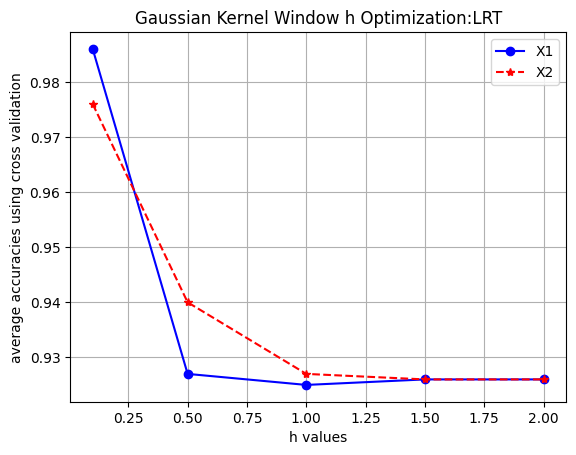

Best h for X1 using LRT is:0.1, best accuracy is:0.986
Best h for X2 using LRT is:0.1, best accuracy is:0.986


In [24]:
hs = [0.1, 0.5, 1, 1.5, 2]
accuracies1_LRT = cross_validation(X1_na, models1, labels1_na, p1, 5, hs, "LRT")
accuracies2_LRT = cross_validation(X2_na, models2, labels2_na, p2, 5, hs, "LRT")

plt.figure()
plt.plot(hs, accuracies1_LRT, marker='o', linestyle='-', color='b', label='X1')
plt.plot(hs, accuracies2_LRT, marker='*', linestyle= '--', color = 'r', label= 'X2')
plt.title('Gaussian Kernel Window h Optimization:LRT')
plt.xlabel('h values')
plt.ylabel('average accuracies using cross validation')
plt.legend()
plt.grid(True)
plt.show()

print("Best h for X1 using LRT is:{0}, best accuracy is:{1}".format(hs[np.argmax(accuracies1_LRT)], accuracies1_LRT[np.argmax(accuracies1_LRT)]))
print("Best h for X2 using LRT is:{0}, best accuracy is:{1}".format(hs[np.argmax(accuracies2_LRT)], accuracies1_LRT[np.argmax(accuracies2_LRT)]))

**在X1和X2上使用最大后验概率规则进行h值的交叉验证优化**

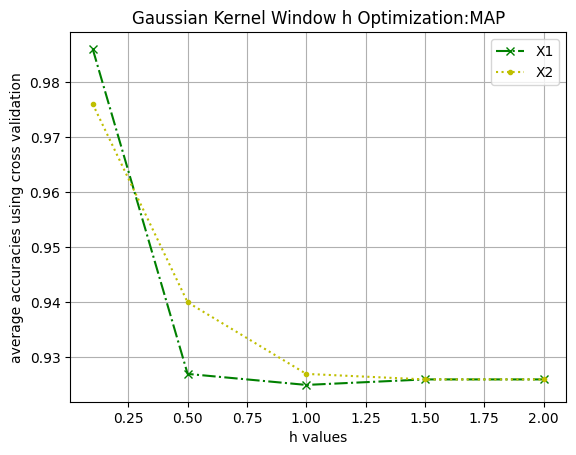

Best h for X1 using MAP is:0.1, best accuracy is:0.986
Best h for X2 using MAP is:0.1, best accuracy is:0.986


In [25]:
accuracies1_MAP = cross_validation(X1_na, models1, labels1_na, p1, 5, hs, "MAP")
accuracies2_MAP = cross_validation(X2_na, models2, labels2_na, p2, 5, hs, "MAP")

plt.figure()
plt.plot(hs, accuracies1_LRT, marker='x', linestyle='-.', color='g', label='X1')
plt.plot(hs, accuracies2_LRT, marker='.', linestyle= ':', color = 'y', label= 'X2')
plt.title('Gaussian Kernel Window h Optimization:MAP')
plt.xlabel('h values')
plt.ylabel('average accuracies using cross validation')
plt.legend()
plt.grid(True)
plt.show()

print("Best h for X1 using MAP is:{0}, best accuracy is:{1}".format(hs[np.argmax(accuracies1_LRT)], accuracies1_LRT[np.argmax(accuracies1_LRT)]))
print("Best h for X2 using MAP is:{0}, best accuracy is:{1}".format(hs[np.argmax(accuracies2_LRT)], accuracies1_LRT[np.argmax(accuracies2_LRT)]))

## h值最优化结果分析
从上面分别对X1和X2均使用似然率规则和最大后验规则进行交叉优化后可以发现：
* 不论是何种情况，对于高斯核函数而言，**待选的h值中0.1总能带来最优的分类性能，且最高分类准确率高到98%。**

* 可以发现对于X1而言，不论是使用LRT还是MAP，除了h=0.1后，从h=0.5开始准确率缓慢下降，但是仍然和最优分类性能有着一些差距，且h=2时最差。**这与理论结果相符合，因为较大的取值会导致产生过度平滑的密度估计，实际上模糊了数据的空间结构。**

* 并且可以发现不论是使用LRT还是MAP，当h=0.1时，在X1上的分类性能都优于在X2上，其实这也可以解释，是因为**X1中三个模型的等可能先验概率分布，而X2中先验概率具有不相同的权重，因此前者必然比后者分类起来较容易一些，准确率也会更高。**

**因此得出结论，分别使用似然率规则和最大后验规则进行交叉优化后，最优的高斯函数窗口h值为0.1。**

## 3.4 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果。

### 3.4.1 K-近邻概率密度计算
对于K近邻概率密度估计，**区域大小不再是样本数量N的函数，而是这K个数据的函数。因此这里直接首先根据K选取，然后以第K个最近邻的距离为半径的圆形定义为V。**

而后基于**上述事实和非参数估计的K近邻密度概率公式，编写代码如下：**

In [30]:
N = 1000
# number corresponding to different categories
NC1 = []
NC1.append([len(m) for m in models1])
NC2 = []
NC2.append([len(m) for m in models2])

def KNN_PD_Estimation(X, labels, NC, k, TestRule):
    """
    @todo Estimation on probability density
    @param X: dataset to be classified
    @param labels: true labels of xs
    @param NC: number corresponding to different categories
    @param k: k for KNN
    @param TestRule: LRT or MAP
    @return: predicted labels
    """
    labelss= [labels.copy() for _ in range(1000)]
    dists = [cdist([x], X) for x in X]
    likelihoods=[]
    posteriors=[]
    for i in range(1000):
        indices = np.argsort(dists[i])
        dists[i]=dists[i][0][indices[0]]# from the min to the max
        labelss[i]=labelss[i][indices[0]]# correspoding changes

        # calculate V
        r= dists[i][k]# 1-k(exclude 0 itself)
        V= np.pi*r**2
        ks=[0,0,0]
        for j in range(k):
            ks[labelss[i][j]-1]+=1# categories counting
        ks=np.array(ks)
        NC=np.array(NC)
        likelihood = [ks[j]/(NC[0][j]*V) for j in range(3)]
        posterior = [ks[j]/k for j in range(3)]
        likelihoods.append(likelihood)
        posteriors.append(posterior)
    if TestRule == "LRT":
        return [np.argmax(l)+1 for l in likelihoods]
    elif TestRule == "MAP":
        return [np.argmax(p)+1 for p in posteriors]

### 3.4.1 计算并分析 k=1，3，5 时的概率密度估计的分类结果

In [31]:
print("-----------k=1-----------")
LRT_error_rate = calculate_error_rate(labels1, KNN_PD_Estimation(X1, labels1_na, NC1, 1, "LRT"))
MAP_error_rate = calculate_error_rate(labels2, KNN_PD_Estimation(X2, labels2_na, NC2, 1, "MAP"))

LRT_accuracy = 1 - LRT_error_rate
MAP_accuracy = 1 - MAP_error_rate

print(f"Error Rate of LRT KNN(k=1) on X1: {LRT_error_rate*100:.2f}%")
print(f"Accuracy of LRT KNN(k=1) on X1: {LRT_accuracy*100:.2f}%")

print(f"Error Rate of MAP KNN(k=1) on X2: {MAP_error_rate*100:.2f}%")
print(f"Accuracy of MAP KNN(k=1) on X2: {MAP_accuracy*100:.2f}%")

print("-----------k=3-----------")
LRT_error_rate = calculate_error_rate(labels1, KNN_PD_Estimation(X1, labels1_na, NC1, 3, "LRT"))
MAP_error_rate = calculate_error_rate(labels2, KNN_PD_Estimation(X2, labels2_na, NC2, 3, "MAP"))

LRT_accuracy = 1 - LRT_error_rate
MAP_accuracy = 1 - MAP_error_rate

print(f"Error Rate of LRT KNN(k=3) on X1: {LRT_error_rate*100:.2f}%")
print(f"Accuracy of LRT KNN(k=3) on X1: {LRT_accuracy*100:.2f}%")

print(f"Error Rate of MAP KNN(k=3) on X2: {MAP_error_rate*100:.2f}%")
print(f"Accuracy of MAP KNN(k=3) on X2: {MAP_accuracy*100:.2f}%")

print("-----------k=5-----------")
LRT_error_rate = calculate_error_rate(labels1, KNN_PD_Estimation(X1, labels1_na, NC1, 5, "LRT"))
MAP_error_rate = calculate_error_rate(labels2, KNN_PD_Estimation(X2, labels2_na, NC2, 5, "MAP"))

LRT_accuracy = 1 - LRT_error_rate
MAP_accuracy = 1 - MAP_error_rate

print(f"Error Rate of LRT KNN(k=5) on X1: {LRT_error_rate*100:.2f}%")
print(f"Accuracy of LRT KNN(k=5) on X1: {LRT_accuracy*100:.2f}%")

print(f"Error Rate of MAP KNN(k=5) on X2: {MAP_error_rate*100:.2f}%")
print(f"Accuracy of MAP KNN(k=5) on X2: {MAP_accuracy*100:.2f}%")

-----------k=1-----------
Error Rate of LRT KNN(k=1) on X1: 0.00%
Accuracy of LRT KNN(k=1) on X1: 100.00%
Error Rate of MAP KNN(k=1) on X2: 0.00%
Accuracy of MAP KNN(k=1) on X2: 100.00%
-----------k=3-----------
Error Rate of LRT KNN(k=3) on X1: 5.70%
Accuracy of LRT KNN(k=3) on X1: 94.30%
Error Rate of MAP KNN(k=3) on X2: 4.80%
Accuracy of MAP KNN(k=3) on X2: 95.20%
-----------k=5-----------
Error Rate of LRT KNN(k=5) on X1: 6.40%
Accuracy of LRT KNN(k=5) on X1: 93.60%
Error Rate of MAP KNN(k=5) on X2: 5.40%
Accuracy of MAP KNN(k=5) on X2: 94.60%


### 结果分析
   在上面的实验中，通过编写**KNN的概率密度估计函数，在X1上使用LRT即似然率规则，在X2上使用MAP即最大后验规则，针对k=1，3，5进行实验。**
   
   实验结果如上，可以发现：
 * **k=1时不论是在X1上应用LRT还是MAP均得到了100%的准确率，这代表了分类的极高准确度！证明实验很成功。**
 * k=3,5时的准确率虽然相较于k=1有所下降，但仍然保持在较高水平，**在94%以上，进一步证明了KNN概率密度分类器性能的高效。**
 * 分类准确率随着k的值增大有了轻微的下降，**推测这可能是因为k增大后噪声点和一些离群点带来的影响降低了分类器的性能。**
 * 在X1上应用LRT和在X2上应用MAP，实际上可以发现使用MAP的效果要优于LRT，**其实之前应用参数估计和高斯核函数也验证了这一点，推测这是因为MAP比LRT多考虑了贝叶斯估计和先验概率，作为估计方法来说更为准确高效。**
 * 可以发现**KNN概率密度估计方法的性能要优于参数估计，但低于高斯核函数密度估计。推测这是因为高斯核函数估计中窗口函数的取值是很soft的，而KNN概率密度估计窗口函数取值非0即1过于hardcore。** 这里可以仿照高斯核函数对窗口函数进行soften化，有待进一步探究。

## 实验总结
本次实验中，通过依次实现基础、中级以及高级三个阶段的要求，我实现了：
* **数据产生：**
    
    首先为了后面进行**参数和非参数估计提供基本的数据**，基于三个不同的正态分布的模型（均值和协方差不同）和三个模型或相同或不同的先验概率，成功生成了两组N=1000的二维随机数据。

* **基础要求**

    基于生成的数据集，**基于参数估计方法**，分别应用了**似然率测试规则（LRT）和最大后验概率规则（MAP）** 进行了分类实验，其中在X1上采用LRT，在X2上采用MAP，**最后发现分类错误率均低于10%，准确率均在92%以上，并且两种参数估计方式的结果差异不大。验证了完成的分类器性能较为优异。**

* **中级要求**

    在基础要求的实现之后，**基于非参数估计方法**， 主要使用**高斯核函数（先默认h=0.1）** 也是分别采用似然率测试规则（LRT）和最大后验概率规则（MAP）进行了分类实验，**分类准确率高到98%，随后便对其性能相较于参数估计的优异进行了初步的分析。**

    在这之后，**基于交叉验证（K=5）采用似然率测试规则（LRT）和最大后验概率规则（MAP）对最优的高斯核函数窗口值进行了优化探索，在[0.1, 0.5, 1, 1.5, 2]中发现h=0.1时分类性能最为优异。并进行了可视化结果呈现。**

* **高级要求**

    实现了K近邻概率密度估计，**计算了k=1，3，5 时的概率密度估计结果，找到了很多规律和现象，并都进行了初步的推测和分析。**


## 误差分析
本次实验中，参数估计进行分类的方式性能要低于高斯核函数的非参数估计，**这可能是由于数据集本身的原因造成的。**

## 改进方向
* 基础要求中，数据本身均值较常规，甚至协方差矩阵为单位矩阵使得数据之前的独立同分布，但是实际上**可以试图去构造更为复杂的数据模型本身再进行后续的参数和非参数估计可能能够更好的分析和对比出二者差别；**
* 中级要求中计算高斯核函数采用的cdist库默认使用欧几里得距离，可以尝试别的距离计算方式，比较差异；
* 中级要求中K折检验默认使用K=5，**实际上可以尝试多种K值选择，甚至使用留一法对高斯窗口函数值进行优化。**
* 高级要求中使用的k值相对于整个数据的数量级10的3次方来说还是较小，**有待使用更大的k值进行进一步探索，然后找到k值增大后的更多规律，甚至使用k折交叉校验对k值进行优化。**
* 高级要求中使用的KNN概率密度估计算法的窗口函数值过于hardcore，**可以考虑为不同距离的点增加一个权重系数，由于soften化窗口函数，不再是非0即1，这样能进一步提高分类器的鲁棒性和性能。**
* 中级和高级要求中，**由于数据量其实仍然偏少，数据集较小**，若数据量趋近于无穷，则高斯核函数密度估计和最近邻密度估计都会收敛于真实的概率密度函数，**有待使用数据量更大的数据对非参数估计的优势进行进一步观察。**


## 实验心得和收获

* 本次实验中，我通过亲自编写数据生成，了解了怎么基于不同的均值，协方差和先验概率生成实验数据；

* 对上课老师所讲的参数估计和非参数的原理加深了理解，通过亲自使用似然率测试规则（LRT）和最大后验概率规则（MAP）规则，**让我更深刻地体会到机器学习本质上就是在去求取概率密度分布；**

* 通过交叉验证优化高斯窗口函数的h值，让我对这个值的重要性以及交叉检验方法都有了更好的掌握。

* 编程实现高斯核函数和K最近邻密度估计，也让我对两个算法有个亲身的体会，增强了我的编程能力。

总的来说我收获颇丰，我会继续完善模型，加深我对参数估计和非参数估计两种机器学习的核心方式的理解和掌握。